In [ ]:
import scipy.io as sio
from torch.utils.data import DataLoader 
import torch
from torch import nn
import numpy as np
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename1 = '/content/drive/MyDrive/denoiser/deconvolver_sin1.mat'
#filename2 = '/content/drive/MyDrive/denoiser/data_randomvariance.mat'
batch_size = 64

data1 = sio.loadmat(filename1)
#data2 = sio.loadmat(filename2)

train1 = data1['train']
test1 = data1['test']

#train2 = data2['train']
#test2 = data2['test']

#train = np.concatenate((train1[0:20000,:,:],train2[0:20000,:,:]))?
#test = np.concatenate((test1[0:3000,:,:],test2[0:3000,:,:]))

train_data = DataLoader(train1,batch_size=batch_size,shuffle=True,num_workers=2)
test_data = DataLoader(test1,batch_size=batch_size,shuffle=True,num_workers=2)

In [ ]:
class denoiser(nn.Module):
  def __init__(self):
    super(denoiser,self).__init__()
    self.conv = nn.Sequential(
        
        # nn.Conv1d(1,1,kernel_size=17,padding=8,bias=False),

        # nn.Conv1d(1,1,kernel_size=17,padding=8,bias=False),

        nn.Conv1d(1,2,kernel_size=9,padding=4,bias=False),
        nn.ReLU(inplace=True),

        nn.Conv1d(2,2,kernel_size=17,padding=8,bias=False),
        nn.ReLU(inplace=True),

        # nn.Conv1d(2,2,kernel_size=17,padding=8,bias=False),
        # nn.ReLU(inplace=True),

        # nn.Conv1d(2,2,kernel_size=17,padding=8,bias=False),
        # nn.ReLU(inplace=True),

        # nn.Conv1d(2,2,kernel_size=17,padding=8,bias=False),
        # nn.ReLU(inplace=True),

        nn.Conv1d(2,2,kernel_size=37,padding=18,bias=False),
        nn.ReLU(inplace=True),

        nn.Conv1d(2,1,kernel_size=9,padding=4,bias=False)
    )

  def forward(self,x):
    
    x = self.conv(x)
    return x

In [ ]:
model = denoiser()
weight = sio.loadmat('/content/drive/MyDrive/denoiser/deconv2_pre.mat')
# model._modules['conv'][0]._parameters['weight'].data = torch.from_numpy(weight['conv1'])
# model._modules['conv'][1]._parameters['weight'].data = torch.from_numpy(weight['conv2'])
# model._modules['conv'][2]._parameters['weight'].data = torch.from_numpy(weight['conv3'])
# model._modules['conv'][4]._parameters['weight'].data = torch.from_numpy(weight['conv4'])
# model._modules['conv'][6]._parameters['weight'].data = torch.from_numpy(weight['conv5'])
for i in range(7):
  if i%2==0:
    model._modules['conv'][i]._parameters['weight'].data = torch.from_numpy(weight['conv'+str(i//2+1)])

model._modules['conv'][2]._parameters['weight'].data = torch.rand(2,2,17)
# model._modules['conv'][8]._parameters['weight'].data = torch.rand(2,2,17)
# model._modules['conv'][6]._parameters['weight'].data = torch.rand(2,2,17)
# model._modules['conv'][8]._parameters['weight'].data = torch.rand(2,2,17)
#model._modules['conv'][2]._parameters['weight'].data[:,:,9] = 0.6
#model._modules['conv'][4]._parameters['weight'].data = 0.6*torch.rand(2,8,17)-0.4
#model._modules['conv'][4]._parameters['weight'].data[:,:,9] = 1.5

In [ ]:
for name,value in model.named_parameters():
  if (name=='conv.0.weight')|(name=='conv.4.weight')|(name=='conv.6.weight'):
    value.requires_grad = False

epochs = 700
device = torch.device("cuda:0")
model = model.to(device)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=1e-3)
#optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=300,gamma=0.1)
loss = nn.MSELoss().to(device)
summary(model, (1, 500))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 500]              17
            Conv1d-2               [-1, 1, 500]              17
            Conv1d-3               [-1, 2, 500]             148
            Conv1d-4               [-1, 1, 500]              18
Total params: 200
Trainable params: 200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


Epoch: 0      train loss: 28.374302      test loss: 12.135819
Epoch: 5      train loss: 3.604379      test loss: 3.546622
Epoch: 10      train loss: 1.469993      test loss: 1.336375
Epoch: 15      train loss: 1.070799      test loss: 1.072395
Epoch: 20      train loss: 1.042850      test loss: 1.048678


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5c8c2d7b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5c8c2d7b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch: 25      train loss: 1.018608      test loss: 1.024691
Epoch: 30      train loss: 1.016276      test loss: 1.022140
Epoch: 35      train loss: 1.006920      test loss: 1.012194
Epoch: 40      train loss: 1.005802      test loss: 1.011937
Epoch: 45      train loss: 1.006078      test loss: 1.011937
Epoch: 50      train loss: 1.006048      test loss: 1.011933
Epoch: 55      train loss: 1.005771      test loss: 1.012149
Epoch: 60      train loss: 1.006160      test loss: 1.012118
Epoch: 65      train loss: 1.006066      test loss: 1.011920
Epoch: 70      train loss: 1.006001      test loss: 1.012336
Epoch: 75      train loss: 1.006053      test loss: 1.012419
Epoch: 80      train loss: 1.006057      test loss: 1.012241
Epoch: 85      train loss: 1.005984      test loss: 1.012009
Epoch: 90      train loss: 1.005745      test loss: 1.012638
Epoch: 95      train loss: 1.006061      test loss: 1.011820
Epoch: 100      train loss: 1.006068      test loss: 1.012155
Epoch: 105      train l

KeyboardInterrupt: ignored

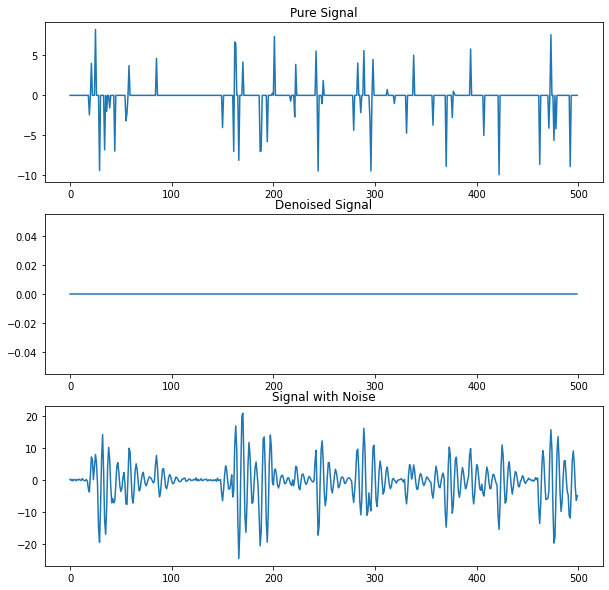

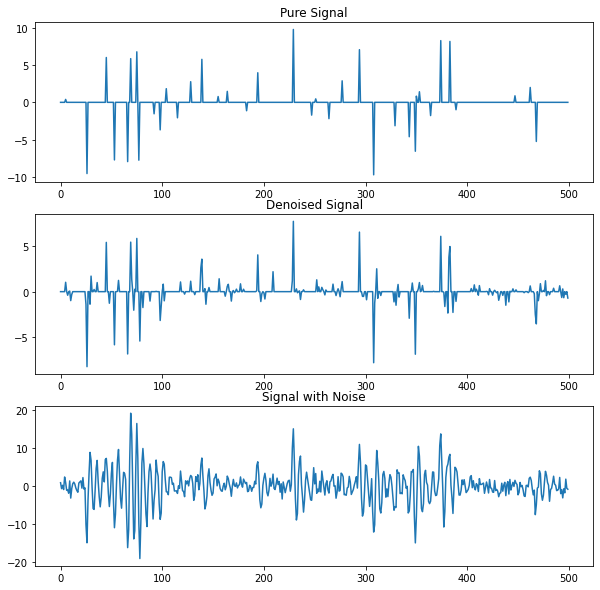

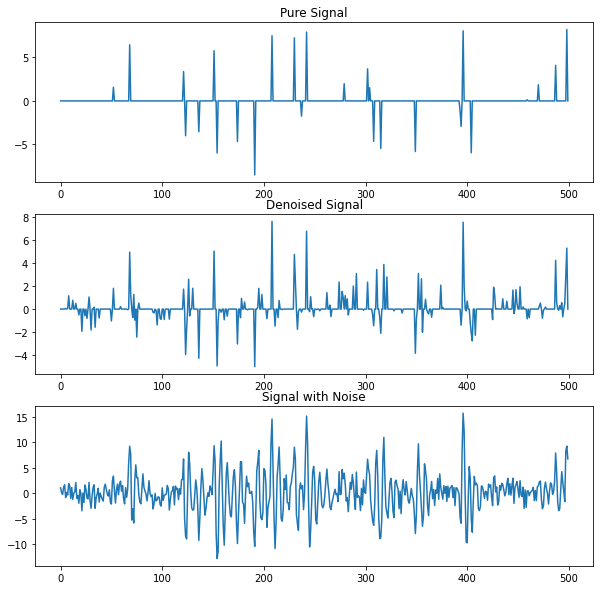

In [ ]:
train_loss_epoch = []
test_loss_epoch = []
for epoch in range(epochs):
  train_losses = []
  test_losses = []
  for training in train_data:
    model.train()
    x_train = training[:,0,:].view(-1,1,500).type(torch.FloatTensor).to(device)
    y_train = training[:,2,:].view(-1,1,500).type(torch.FloatTensor).to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss_train = loss(y_pred,y_train)
    loss_train.backward()
    optimizer.step()
    train_losses.append(loss_train.item())
  train_loss_epoch.append(np.mean(train_losses))
  scheduler.step()

  for testing in test_data:
    model.eval()
    x_test = testing[:,0,:].view(-1,1,500).type(torch.FloatTensor).to(device)
    y_test = testing[:,2,:].view(-1,1,500).type(torch.FloatTensor).to(device)
    y_pred = model(x_test)
    loss_test = loss(y_pred,y_test)
    test_losses.append(loss_test.item())
  test_loss_epoch.append(np.mean(test_losses))

  if (epoch%5)==0:
    print("Epoch: %d      train loss: %f      test loss: %f" %(epoch,np.mean(train_losses),np.mean(test_losses)))

  if ((epoch%100)==99)|(epoch==0):
    signal = y_test.view(-1,500).cpu().detach().numpy()
    denoised = y_pred.view(-1,500).cpu().detach().numpy()
    noisy = x_test.view(-1,500).cpu().detach().numpy()
    #SDR = np.mean(np.sum(signal**2,1)/np.sum(denoised**2,1))
    #print("Epoch: %d      SDR: %f" %(epoch,SDR))
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    plt.plot(signal[0])
    plt.title('Pure Signal')
    plt.subplot(3,1,2)
    plt.plot(denoised[0])
    plt.title('Denoised Signal')
    plt.subplot(3,1,3)
    plt.plot(noisy[0])
    plt.title('Signal with Noise')


In [ ]:
weight_trained = dict()
# weight_trained['conv1'] = model._modules['conv'][0]._parameters['weight'].data.cpu().numpy()
# weight_trained['conv2'] = model._modules['conv'][1]._parameters['weight'].data.cpu().numpy()
# weight_trained['conv3'] = model._modules['conv'][2]._parameters['weight'].data.cpu().numpy()
# weight_trained['conv4'] = model._modules['conv'][4]._parameters['weight'].data.cpu().numpy()
# weight_trained['conv5'] = model._modules['conv'][6]._parameters['weight'].data.cpu().numpy()
for i in range(7):
  if i%2==0:
    weight_trained['conv'+str(i//2+1)] = model._modules['conv'][i]._parameters['weight'].data.cpu().numpy()
sio.savemat('/content/drive/MyDrive/denoiser/deconv2.mat', mdict=weight_trained)